[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/upm-classes/aapi_2023/blob/main/03_SIFT.ipynb)

### Scale-Invariant Feature Transform (SIFT)

SIFT permite localizar las características locales de una imagen, conocidas como "puntos clave" de la imagen. Estos puntos clave son invariantes ante la escala y la rotación, y se pueden utilizar para diversas aplicaciones de visión por computadora, como la comparación de imágenes, la detección de objetos, etc.



In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
image_path = './images'

In [3]:
im1 = cv2.imread(os.path.join(image_path, '05246669_3774806731.jpg'))

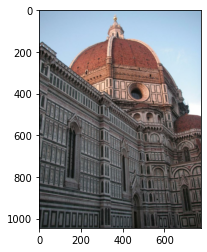

In [4]:
# Visualization of the images

plt.imshow(im1[...,::-1])
plt.show()

To operate with SIFT, we need to transform the RGB images into grayscale images.

In [5]:
gray_im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

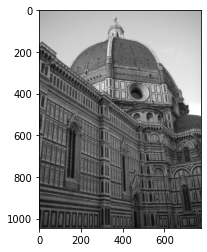

In [6]:
# Visualization of the images
plt.imshow(gray_im1, cmap='gray')
plt.show()

Para operar con SIFT, necesitamos transformar las imágenes en RGB a imágenes en escala de grises.

In [7]:
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(gray_im1, mask=None)

In [8]:
# Drawing keypoints in image

im1_sift = cv2.drawKeypoints(gray_im1, keypoints_1, im1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

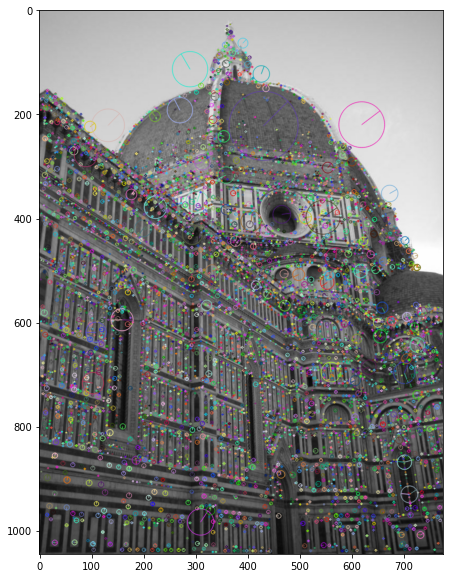

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(im1_sift)
plt.show()

### Coincidencia de características

Una aplicación de SIFT es emparejar dos imágenes. Los puntos clave entre dos imágenes se emparejan identificando a sus vecinos más cercanos.

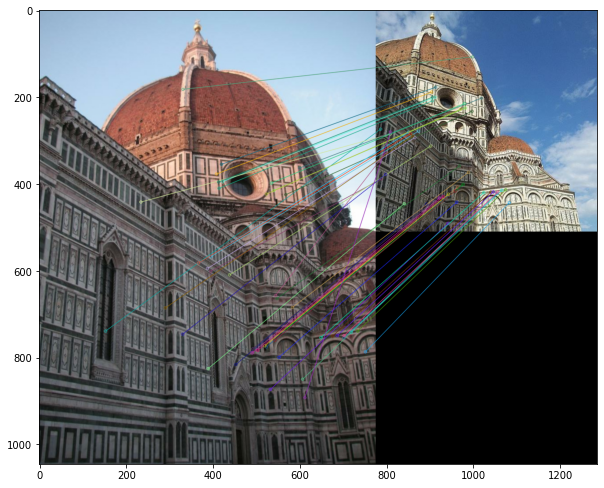

In [10]:
# Open Images
im1 = cv2.imread(os.path.join(image_path, '05246669_3774806731.jpg'))
im2 = cv2.imread(os.path.join(image_path, '06138839_8793674417.jpg'))

# To grayscale
gray_im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
gray_im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# SIFT calculation
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(gray_im1, mask=None)
keypoints_2, descriptors_2 = sift.detectAndCompute(gray_im2, mask=None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# perform Matching
matches = bf.match(descriptors_1, descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

im2_out = im2.copy() * 0.0

im_match = cv2.drawMatches(im1[...,::-1], keypoints_1, 
                           im2[...,::-1], keypoints_2, matches[:50], 
                           im2_out, flags=2)

plt.figure(figsize=(10,10))
plt.imshow(im_match)
plt.show()